In [2]:
import numpy as np
import pylab as plt

## Task 1

1.9781259215912072e+20
2.0026573860258582e+20


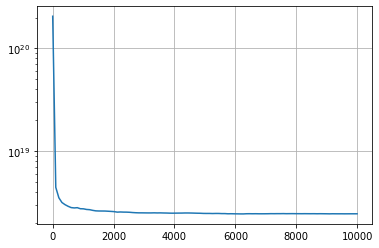

In [10]:
G = 6.67e-11
m1 = 6e24
m2 = 7.35e22
r = 384467e3
rho1 = 5520
rho2 = 3346
R1 = 63.67e5
R2 = 17.37e5
N = int(1e4)

m1 = 4/3 * np.pi * R1**3 * rho1
m2 = 4/3 * np.pi * R2**3 * rho2

V1 = m1/rho1
V2 = m2/rho2

F_an = G * m1 * m2 / r**2

func = lambda r1, r2: (r2[0] - r1[0])/np.linalg.norm(r1-r2)**3


F = 0
err = []

for i in range(N):
    n1 = np.random.rand(3)
    n1 = R1 * n1 / np.linalg.norm(n1)
    
    n2 = np.random.rand(3)
    n2 = R2 * n2 / np.linalg.norm(n2)
    n2[0] += r
    
    F += func(n1, n2)
    if i % 100 ==1:
        err.append(F_an - (V1*V2)*G*rho1*rho2*F/i)
    
print(F_an)
print((V1*V2)*G*rho1*rho2*F/i)
    
    
plt.plot(np.linspace(0, N, 100), np.abs(err))
plt.yscale('log')
plt.grid()
plt.show()

## Task 2

In [18]:
S_scat = 3
S_abs = 10
h = 1

N = int(1e4)

P0 = 0
Pp = 0
Pm = 0

for i in range(N):
    r = -1/((S_scat + S_abs)*np.log(np.random.rand()))
    
    done = False
    
    while r >= 0 and r <= h:        
        lamda = -1/((S_scat + S_abs)*np.log(np.random.rand()))
        phi = np.random.rand()*2*np.pi
        r += lamda*np.cos(phi)
        gamma = np.random.rand()
        
        if gamma < S_abs/(S_scat + S_abs):
            P0 += 1/N
            done = True
            break
    
    if r <= 0 and not done:
        Pm += 1/N
    if r >= h and not done:
        Pp += 1/N

print(P0, Pp, Pm)

0.8732999999999201 0.07750000000000119 0.04920000000000038


## Task 3

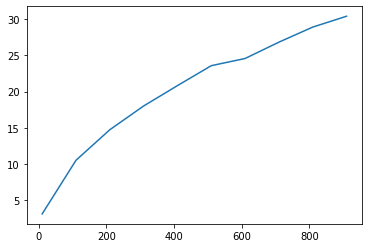

(array([ 1.,  5.,  3.,  4.,  1.,  6.,  7.,  6., 14.,  7., 19., 30., 23.,
        28., 13., 45., 33., 51., 49., 27., 41., 46., 46., 50., 23., 53.,
        59., 47., 32., 16., 32., 33., 33., 23., 10., 28.,  8., 10., 10.,
         2., 10.,  4.,  3.,  3.,  1.,  2.,  0.,  1.,  0.,  2.]),
 array([-82. , -78.4, -74.8, -71.2, -67.6, -64. , -60.4, -56.8, -53.2,
        -49.6, -46. , -42.4, -38.8, -35.2, -31.6, -28. , -24.4, -20.8,
        -17.2, -13.6, -10. ,  -6.4,  -2.8,   0.8,   4.4,   8. ,  11.6,
         15.2,  18.8,  22.4,  26. ,  29.6,  33.2,  36.8,  40.4,  44. ,
         47.6,  51.2,  54.8,  58.4,  62. ,  65.6,  69.2,  72.8,  76.4,
         80. ,  83.6,  87.2,  90.8,  94.4,  98. ]),
 <BarContainer object of 50 artists>)

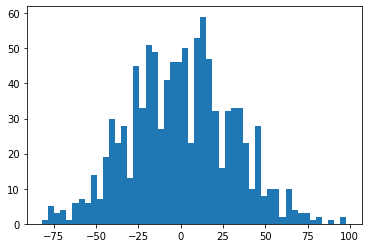

In [7]:
xs = []
T = 100
N = 1000

disp = []
for T in range(10, 1000, 100):
    xs = []
    for i in range(N):
        x = 0
        for j in range(T):
            x += np.random.randint(0, 2)*2 -1
        xs.append(x)
    disp.append(np.std(xs))
    
plt.plot(np.arange(10, 1000, 100), disp)
plt.show()
        
plt.hist(xs,bins=50)

## Task 4

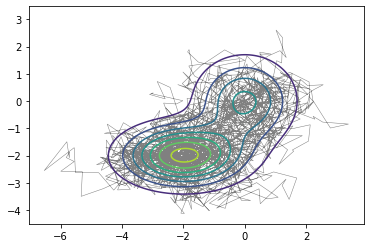

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.mlab as mlab
import scipy
import scipy.stats as stats

delta = 0.025
X, Y = np.meshgrid(np.arange(-4.5, 2.0, delta), np.arange(-3.5, 3.5, delta))

z1 = stats.multivariate_normal([0,0],[[1.0,0],[0,1.0]])
z2 = stats.multivariate_normal([-2,-2],[[1.5,0],[0,0.5]])
def z(x): return 0.4*z1.pdf(x) + 0.6*z2.pdf(x)

Z01 = scipy.stats.multivariate_normal([0, 0], [[1.0, 0.0], [0.0, 1.0]])
Z1 = Z01.pdf(np.dstack((X, Y)))

Z02 = scipy.stats.multivariate_normal([-2, -2], [[1.5, 0], [0, 0.5]])
Z2 = Z02.pdf(np.dstack((X, Y)))


Z = 0.4*Z1 + 0.6*Z2

Q = stats.multivariate_normal([0,0],[[0.05,0],[0,0.05]])
r = [0,0]
samples = [r]
for i in range(10000):
    rq = Q.rvs() + r
    a = z(rq)/z(r) 
    if np.random.binomial(1,min(a,1),1)[0] == 1:
        r[0] = rq[0]
        samples += [r.copy()]
        r[1] = rq[1]
        samples += [r.copy()]

codes = np.ones(len(samples), int) * path.Path.LINETO
codes[0] = path.Path.MOVETO

p = path.Path(samples[::10],codes[::10])

fig, ax = plt.subplots()
ax.contour(X, Y, Z)
ax.add_patch(patches.PathPatch(p, facecolor='none', lw=0.5, edgecolor='gray'))
plt.show()

## Task 5

Доля отвергнутых кандидатов: 0.38908


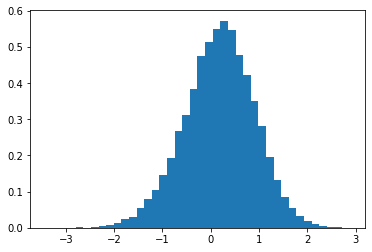

In [27]:
def proba_density(x):
    
    return np.exp(-x**2)* (3 + np.cos(x) + 2*np.sin(x) + x**2)

x = 0.1 # Поставим очень плохое начальное приближение
B = 2

N = 100000

xs = np.zeros(N)
xs[0] = x

rejected = 0
for i in range(1, N):
    x_cand = xs[i-1] + np.random.normal(loc=0.0, scale=1.0)
    
    if proba_density(x_cand)/proba_density(xs[i-1]) >= 1:
        xs[i] = x_cand
        continue
    else:
        if np.random.uniform(0, 1) < proba_density(x_cand)/proba_density(xs[i-1]): # q = 1 т.к. симметричное распределение
            xs[i] = x_cand
            continue
        else:
            xs[i] = xs[i-1]
            rejected  += 1
            continue
plt.hist(xs, bins = 40, density=True)
print(f"Доля отвергнутых кандидатов: {rejected/N}")